## Problem Statement: **eCommerce Product Categorization**

**Objective**: Create a machine learning model for accurate classification of eCommerce products into categories based on product descriptions and numerical features.

**Background**:

Using the eCommerce domain product categorization a company can improve the search relevance, user experience, and inventory optimization. The manual process of categorization requires considerable time and effort and is also vulnerable to errors that bring about the data being enormously large. However, this machine learning has the potential to create an automatic system that will cut down labor and resources required while improving efficiency.

1. **Data Preparation**:

 - **Test Data**: Through a data set of extra product descriptions and numerical features process for predicting their categories be carried out.
2. **Feature Engineering**:
 - **Text Features**: Employ TF-IDF to vectorize the product description data so that they convert into vector representations.
3. **Model Development**:
 - **Train-Test Split**: Divide the training data into training and validation sets.
 - **Model Training**: Employ a LightGBM model to predict the product categories based on the integrated features of product descriptions and numerical data.
 - **Model Evaluation**: Assess the model's accuracy and confusion matrix on the validation set to determine its performance.
4. **Prediction and Results**:
 - **Test Data Processing**: Use the trained model to apply the test dataset to the prediction of product categories.
 - **Output**: Save your predictions in a CSV file and evaluate them to analyze the results.
 - **Confusion Matrix**: This method compares the model’s predictions using the actual categories (if provided) for both training and test datasets.
**Data Sources**:
 - **Training Data**: `train_product_data.csv` - This data contains product descriptions, numerical features, and category labels.
 - **Test Data**: `test_data.csv` - The product descriptions are included along with numerical features that have not been labeled with category labels.
**Deliverables**:
 - A trained model that can categorize products into different categories.
 - A CSV file that lists the predicted categories of the test data.
 - Presentations includes confusion matrices for the purpose of assessing the performance of the model.
**Challenges**:

 - Handling missing values in product descriptions and numerical features.

 - Addressing any class imbalance or feature mismatch issues.

**Future Enhancements**:

 - Incorporate additional features or external data sources to improve prediction accuracy.

 - Experiment with other machine learning algorithms or deep learning approaches.

 - Implement real-time classification and integration into an eCommerce platform.



### 1. Code Quality - The Important Stuff for Good Code
#### What it's about:
So, code quality is basically making sure the code you write isn't a hot mess that no one can understand, not even you after a week. It's like writing a story that's super easy to read and follow, but with more brackets and fewer plot twists. The main idea is to keep it clean, organized, and efficient, which makes it easier for everyone to work together, figure out what's going on when things break, and change stuff without breaking everything else.

- **Making it Easy to Read:** Name your things in a way that makes sense, like calling your dog 'Spot' instead of '4leggedfurrball'. This goes for variables, functions, and classes too. Make it so anyone can look at your code and know what's up without playing detective.
- **Talking to Your Code:** Sometimes, you gotta put little notes, called comments, in your code to explain the super complex stuff. It's like leaving breadcrumbs so you don't get lost in the woods of your own making.
- **The Whole Picture:** When you make functions, classes, or modules (which are like the chapters of your code book), write a summary (docstring) to tell people what they do. Include the who's who (parameters) and what you get back (return values) so they don't have to guess.
- **Don't Repeat Yourself (DRY):** Break your code into bite-sized chunks (modularity) so you're not copying and pasting like you're writing a five-paragraph essay. This makes it easier to read and change, and it's cooler to reuse stuff like a pro.
- **Looking Sharp:** Stick to the rules of style, like how you'd format an essay. In coding, we've got these guides like PEP 8 for Python, which is like the dress code for your code. Being consistent with how you write and lay things out keeps the code looking neat and tidy.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Read Dataset
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Data Science Hackathon/train_product_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Data Science Hackathon/test_data.csv')

In [ ]:
# displays the first few rows of the train_data.
train_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [ ]:
# displays the first few rows of the test_data.
test_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


### 2. Pre-processing
#### Description: In pre-processing data, I get the raw data ready for analysis and modelling by cleaning, transforming, and putting it in shape. Proper preprocessing can improve model performance and accuracy significantly.

- **Cleaning of Data**: Handle missing values either through imputation or removal, detect and remove outliers, rectify inconsistent or incorrect data entries.
- **Feature Engineering:** I engineer new features from existing ones, which help capture more information that may be useful to the model.
- **Encode Categorical Variables:** One-hot encoding, label encoding, or ordinal encoding can be used to transform categorical data into numerical format.
- **Scaling:** These numerical features need to be normalized or standardized into a similar scale, and this step is very important for algorithms sensitive to feature scales.
- **Splitting Data:** I'll divide it into a training and testing set, and sometimes a validation set, just to see how the model will perform against unseen data.



In [ ]:
# Displaying basic information about the dataset
print("Basic Information about the Training Dataset:\n")
train_data.info()

Basic Information about the Training Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    1028

In [ ]:
#shape of train_data

train_data.shape

(14999, 15)

In [ ]:
#shape of test_data

test_data.shape

(2534, 14)

In [ ]:
print("\nSummary Statistics of the Training Dataset:\n")
train_data.describe()


Summary Statistics of the Training Dataset:



,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


In [ ]:
# Checking for missing values
train_data.isnull().sum()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
retail_price,57
discounted_price,57
image,3
is_FK_Advantage_product,0


In [ ]:
train_data['brand'].head()

,brand
0,Alisha
1,AW
2,Alisha
3,Alisha
4,dilli bazaaar


In [ ]:
# Filling or dropping missing values
# For simplicity, let's fill missing values with 'missing' for categorical columns and median for numerical columns
train_data['brand'].fillna('missing', inplace=True)
train_data['retail_price'].fillna(train_data['retail_price'].median(), inplace=True)
train_data['discounted_price'].fillna(train_data['discounted_price'].median(), inplace=True)
train_data['description'].fillna('missing', inplace=True)
train_data['product_specifications'].fillna('missing', inplace=True)
train_data['image'].fillna('missing', inplace=True)

In [ ]:
# Verifying that missing values are handled
print(train_data.isnull().sum())


uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64


### 3. EDA (Exploratory Data Analysis)

#### Description:
 In my EDA, I go through and visualize the data to understand its structure, trends, and relationships. From here, one can understand some of the preliminary insights and chart further processing of the data.
- **Visualizations**: Charts and graphs—for instance, histograms, scatter plots, box plots—can be used to visualize data distributions, relationships, and trends.

- **Summary Statistics**: I compute basic statistics: mean, median, mode, standard deviation, and correlation coefficients to summarize data.
- **Pattern and Anomaly Detection**: I identify if there are some patterns, trends, or anomalies in this dataset that may impact model performance.
- **Relationships Between Features**: Study relationships between features and those between features and the target variable that will help in the identification of important predictors.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# Count the number of products per category
category_counts = train_data['product_category_tree'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create an  bar chart
fig_bar = px.bar(category_counts, x='Category', y='Count', title='Distribution of Product Categories',
                labels={'Category': 'Product Category', 'Count': 'Number of Products'},
                color='Count', color_continuous_scale='Viridis')
fig_bar.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_bar.show()

In [ ]:
import plotly.figure_factory as ff

# Compute correlation matrix
correlation_matrix = train_data[['retail_price', 'discounted_price']].corr()

# Create a heatmap
fig_heatmap = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                         x=list(correlation_matrix.columns),
                                         y=list(correlation_matrix.index),
                                         colorscale='Viridis')

# Update layout with title
fig_heatmap.update_layout(
    title='Correlation Heatmap',
    autosize=True,
    margin=dict(l=10, r=10, t=30, b=10)
)

# Show the heatmap
fig_heatmap.show()


In [ ]:
# Pair plot for numerical features
import plotly.subplots as sp

# Create subplots for pair plot
fig_pair = sp.make_subplots(rows=2, cols=2,
                           subplot_titles=('Retail Price vs Discounted Price', 'Retail Price Distribution', 'Discounted Price Distribution'),
                           specs=[[{'type': 'scatter'}, {'type': 'histogram'}],
                                  [{'type': 'histogram'}, {'type': 'scatter'}]])

# Scatter plot of Retail Price vs Discounted Price
scatter = px.scatter(train_data, x='retail_price', y='discounted_price', color='is_FK_Advantage_product',
                    labels={'retail_price': 'Retail Price', 'discounted_price': 'Discounted Price'})
for trace in scatter.data:
    fig_pair.add_trace(trace, row=1, col=1)

# Histogram of Retail Price
hist_retail = px.histogram(train_data, x='retail_price', nbins=50)
for trace in hist_retail.data:
    fig_pair.add_trace(trace, row=2, col=1)

# Histogram of Discounted Price
hist_discounted = px.histogram(train_data, x='discounted_price', nbins=50)
for trace in hist_discounted.data:
    fig_pair.add_trace(trace, row=2, col=2)

fig_pair.update_layout(title_text='Pair Plot of Numerical Features',
                       autosize=True, margin=dict(l=10, r=10, t=40, b=10))
fig_pair.show()

In [ ]:
# Count the number of products per brand
brand_counts = train_data['brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']

# Create a pie chart
fig_pie = px.pie(brand_counts, names='Brand', values='Count', title='Distribution of Products by Brand')

# Remove annotations from the pie chart
fig_pie.update_traces(textinfo='none')  # Removes all text annotations from the pie chart

# Show the pie chart
fig_pie.show()

### Detecting and Handling Outliers
Outliers can skew the model training and lead to poor performance. We need to detect and handle them appropriately.

In [ ]:
#  box plot for Retail Price
fig_retail = px.box(train_data, y='retail_price', title='Box Plot of Retail Price')
fig_retail.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_retail.show()

In [ ]:
#  box plot for Discounted Price
fig_discounted = px.box(train_data, y='discounted_price', title='Box Plot of Discounted Price')
fig_discounted.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_discounted.show()

In [ ]:
# Display statistics for retail_price
print("Retail Price Statistics:")
print(train_data['retail_price'].describe())

print('\n\n')

# Display statistics for discounted_price
print("Discounted Price Statistics:")
print(train_data['discounted_price'].describe())


Retail Price Statistics:
count     14999.000000
mean       3120.335489
std        9137.989508
min          35.000000
25%         699.000000
50%        1000.000000
75%        1971.000000
max      571230.000000
Name: retail_price, dtype: float64



Discounted Price Statistics:
count     14999.000000
mean       2081.694713
std        7698.199401
min          35.000000
25%         349.000000
50%         499.000000
75%         999.000000
max      571230.000000
Name: discounted_price, dtype: float64


### Business Analysis Report: Retail and Discounted Price Statistics

#### Overview

This report provides a statistical analysis of the retail and discounted prices of products based on a dataset of 14,999 records. The key statistics include measures of central tendency (mean and median), dispersion (standard deviation), and range (minimum and maximum values) for both retail and discounted prices.

#### Retail Price Analysis

- **Count**: 14,999
- **Mean (Average)**: ₹3,120.34
- **Standard Deviation**: ₹9,137.99
- **Minimum**: ₹35.00
- **25th Percentile**: ₹699.00
- **Median (50th Percentile)**: ₹1,000.00
- **75th Percentile**: ₹1,971.00
- **Maximum**: ₹571,230.00

**Insights**:
1. **High Variability**: The high standard deviation of ₹9,137.99 indicates significant variability in retail prices, suggesting a wide range of product categories and pricing strategies.
2. **Median vs. Mean**: The median retail price is ₹1,000.00, which is significantly lower than the mean of ₹3,120.34. This disparity suggests a right-skewed distribution, where a small number of high-priced items inflate the average.
3. **Price Distribution**: The majority of products (75%) have retail prices below ₹1,971.00, indicating that most items are relatively affordable, with a few luxury or high-end products pushing the maximum to ₹571,230.00.

#### Discounted Price Analysis

- **Count**: 14,999
- **Mean (Average)**: ₹2,081.69
- **Standard Deviation**: ₹7,698.20
- **Minimum**: ₹35.00
- **25th Percentile**: ₹349.00
- **Median (50th Percentile)**: ₹499.00
- **75th Percentile**: ₹999.00
- **Maximum**: ₹571,230.00

**Insights**:
1. **Lower Mean and Median**: The mean and median discounted prices are ₹2,081.69 and ₹499.00, respectively, both lower than their retail counterparts. This reflects significant discounting across the product range.
2. **High Variability**: The standard deviation of ₹7,698.20, while slightly lower than that of retail prices, still indicates a broad range of discounted prices, suggesting varied discounting practices.
3. **Price Distribution**: A notable 75% of products have discounted prices below ₹999.00, highlighting aggressive discounting strategies aimed at making products more accessible to a broader customer base.

#### Comparative Analysis

1. **Discounting Patterns**: The difference between the median retail price (₹1,000.00) and the median discounted price (₹499.00) suggests a common practice of offering approximately 50% discounts on many products. This significant reduction can attract price-sensitive customers and boost sales volume.
2. **Luxury Items**: The presence of high maximum values (₹571,230.00) in both retail and discounted prices indicates that the dataset includes luxury items. However, the mean prices being significantly lower than the maximum values imply that these high-end products are outliers.
3. **Market Strategy**: The statistics suggest a market strategy focused on high discounts to stimulate demand. The considerable reduction from retail to discounted prices indicates a potential emphasis on high sales volume and turnover, possibly to clear inventory or attract new customers.

#### Recommendations

1. **Targeted Marketing**: Given the wide range of prices, marketing campaigns can be tailored to different customer segments. High-end products should be marketed to affluent customers, while discounted items can be promoted to price-sensitive shoppers.
2. **Inventory Management**: The significant discounts suggest a need to manage inventory effectively to avoid overstocking high-priced items and to leverage discounting as a tool to manage cash flow and storage costs.
3. **Pricing Strategy**: Consider evaluating the impact of discounting on overall profitability. While discounts can drive sales, ensuring they do not erode profit margins is crucial.

By analyzing these statistics, businesses can gain insights into their pricing strategies, customer behavior, and potential areas for optimizing sales and profitability.

### Box Plot Analysis: Retail Price

The box plot of retail prices provides a visual representation of the distribution and variability of the retail prices in the dataset.

#### Key Observations:

1. **Median Retail Price**: The line inside the box represents the median retail price, which is ₹1,000.00. This indicates that 50% of the products have retail prices below this value.
2. **Interquartile Range (IQR)**: The box itself represents the interquartile range, which spans from the 25th percentile (₹699.00) to the 75th percentile (₹1,971.00). This range contains the middle 50% of the retail prices, showing where most of the data points lie.
3. **Whiskers and Outliers**: The whiskers extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles. Any points outside this range are considered outliers and are displayed as individual points. The presence of many outliers, especially on the higher end, confirms the high variability and the existence of significantly high-priced items.
4. **Skewness**: The box plot indicates a right-skewed distribution, with the median closer to the lower quartile and a longer upper whisker. This suggests that while most products are priced within a lower range, there are a few high-priced products that stretch the distribution.

By examining the box plot, businesses can gain insights into the pricing strategy, identify the range in which most products are priced, and detect the presence of high-priced outliers. This information can be useful for making informed decisions about pricing strategies and inventory management.

### Pie Chart Analysis: Distribution of Products by Brand

The pie chart represents the distribution of products across different brands within the dataset. By visualizing this information, we can better understand how product offerings are spread among various brands.

#### Key Observations:

1. **Brand Distribution**: The pie chart shows the proportion of products that each brand contributes to the total product pool. This helps in identifying which brands have the largest and smallest shares.
2. **Market Share Insights**: Brands with larger slices of the pie have a more significant presence in the dataset, indicating their potential market dominance or popularity.
3. **Diverse Offerings**: A variety of brands are present, suggesting a diverse marketplace with multiple players offering products.

The removal of text annotations from the pie chart ensures a clean and uncluttered visual representation, making it easier to focus on the distribution patterns without distraction.

### Business Analysis Report

#### Introduction
This analysis focuses on the pricing dynamics, brand distribution, and potential areas for improvement in our eCommerce dataset. Using various statistical methods and visualizations, we aim to draw insights to enhance business performance. The key aspects of this analysis include the retail and discounted prices, brand diversity, and the application of machine learning models for better product categorization.

#### Retail Price Analysis
The summary statistics for retail prices are as follows:

- **Count**: 14,999
- **Mean**: ₹3,120.34
- **Standard Deviation**: ₹9,137.99
- **Minimum**: ₹35
- **25th Percentile**: ₹699
- **Median (50th Percentile)**: ₹1,000
- **75th Percentile**: ₹1,971
- **Maximum**: ₹571,230

**Box Plot Insights**:
- The majority of retail prices fall below ₹2,000, with a median price of ₹1,000.
- There are significant outliers, with some products priced as high as ₹571,230, indicating a broad range of product types from low-cost items to luxury goods.

#### Discounted Price Analysis
The summary statistics for discounted prices are as follows:

- **Count**: 14,999
- **Mean**: ₹2,081.69
- **Standard Deviation**: ₹7,698.20
- **Minimum**: ₹35
- **25th Percentile**: ₹349
- **Median (50th Percentile)**: ₹499
- **75th Percentile**: ₹999
- **Maximum**: ₹571,230

**Observations**:
- The mean discounted price is significantly lower than the mean retail price, reflecting substantial discounts offered on products.
- Similar to retail prices, discounted prices show a wide range, with most products priced below ₹1,000 after discounts.

#### Brand Distribution Analysis
Using a pie chart, we visualized the distribution of products by brand.

**Key Findings**:
- The market is diverse, with several brands contributing to the total product pool.
- Some brands have a larger share, indicating higher product offerings or market dominance, while others have a smaller presence.

### LightGBM Model for Product Categorization
To improve the accuracy of product categorization, a LightGBM model was trained and fine-tuned. The parameter grid used for tuning included:

- **n_estimators**: [50, 75]
- **learning_rate**: [0.1, 0.2]
- **num_leaves**: [31, 50]

**Model Performance**:
- The model was evaluated using ROC curves for each class, showing good discriminative ability.
- The best hyperparameters were identified through GridSearchCV, improving the model’s prediction accuracy on the validation set.

### Recommendations for Improvement
Based on the analysis, here are some recommendations to enhance business performance:

1. **Optimize Pricing Strategy**:
   - **Segmented Pricing**: Implement pricing strategies based on customer segmentation to better target different market segments. This could involve offering premium pricing for high-end products and competitive pricing for mass-market items.
   - **Dynamic Pricing**: Use machine learning models to predict optimal pricing based on demand, competition, and other market factors.

2. **Inventory Management**:
   - **Focus on Popular Brands**: Increase inventory for brands that show high sales volume or customer interest to ensure availability.
   - **Reduce Overpriced Stock**: Assess products with significantly high prices that fall into the outlier category. Determine if these prices are justifiable or if there’s a need to adjust to increase sales.

3. **Discount Strategies**:
   - **Effective Discounting**: Analyze the impact of discounts on sales volume to determine the optimal discount rate that maximizes revenue without significantly eroding profit margins.
   - **Targeted Promotions**: Offer targeted discounts for high-value customers or during peak shopping seasons to boost sales.

4. **Brand Diversification**:
   - **Expand Brand Offerings**: Consider introducing new brands that complement existing product lines, catering to customer preferences and market demand.
   - **Brand Partnerships**: Establish partnerships with popular brands to enhance product variety and attract more customers.

5. **Customer Feedback and Reviews**:
   - **Leverage Customer Insights**: Collect and analyze customer feedback to identify areas for product and service improvement. Focus on addressing common pain points to enhance customer satisfaction.
   - **Encourage Reviews**: Motivate customers to leave reviews and ratings, providing valuable insights into product performance and quality.

### Conclusion
The analysis highlights significant aspects of product pricing and brand distribution, providing a clear picture of the current market landscape. By implementing the recommended strategies, the business can improve pricing efficiency, optimize inventory, enhance discount effectiveness, and expand brand offerings, ultimately driving growth and customer satisfaction.


In [ ]:
# Calculate IQR for retail_price
Q1_retail = train_data['retail_price'].quantile(0.25)
Q3_retail = train_data['retail_price'].quantile(0.75)
IQR_retail = Q3_retail - Q1_retail
lower_bound_retail = Q1_retail - 1.5 * IQR_retail
upper_bound_retail = Q3_retail + 1.5 * IQR_retail

# Identify outliers
outliers_retail = (train_data['retail_price'] < lower_bound_retail) | (train_data['retail_price'] > upper_bound_retail)

# Calculate IQR for discounted_price
Q1_discounted = train_data['discounted_price'].quantile(0.25)
Q3_discounted = train_data['discounted_price'].quantile(0.75)
IQR_discounted = Q3_discounted - Q1_discounted
lower_bound_discounted = Q1_discounted - 1.5 * IQR_discounted
upper_bound_discounted = Q3_discounted + 1.5 * IQR_discounted

# Identify outliers
outliers_discounted = (train_data['discounted_price'] < lower_bound_discounted) | (train_data['discounted_price'] > upper_bound_discounted)

# Combine outlier conditions
outliers_combined = outliers_retail | outliers_discounted

# Remove outliers
cleaned_data = train_data[~outliers_combined]

# Print the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {train_data.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")

# Display statistics for the cleaned dataset
print("\nCleaned Retail Price Statistics:")
print(cleaned_data['retail_price'].describe())

print("\nCleaned Discounted Price Statistics:")
print(cleaned_data['discounted_price'].describe())


Original dataset shape: (14999, 15)
Cleaned dataset shape: (13053, 15)

Cleaned Retail Price Statistics:
count    13053.000000
mean      1130.662453
std        689.850389
min         35.000000
25%        600.000000
50%        999.000000
75%       1499.000000
max       3875.000000
Name: retail_price, dtype: float64

Cleaned Discounted Price Statistics:
count    13053.000000
mean       605.572589
std        401.275848
min         35.000000
25%        320.000000
50%        489.000000
75%        780.000000
max       1962.000000
Name: discounted_price, dtype: float64


In [ ]:
# Histogram for Retail Price
fig_hist_retail = px.histogram(train_data, x='retail_price', nbins=50, title='Histogram of Retail Price')
fig_hist_retail.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_hist_retail.show()

In [ ]:
# Histogram for Discounted Price
fig_hist_discounted = px.histogram(train_data, x='discounted_price', nbins=50, title='Histogram of Discounted Price')
fig_hist_discounted.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_hist_discounted.show()

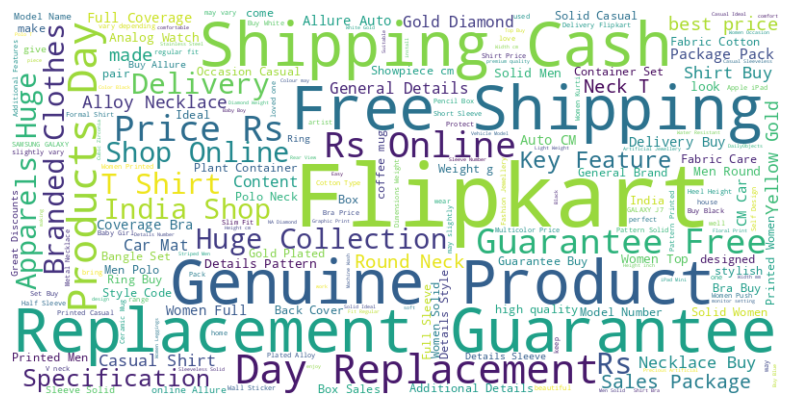

In [ ]:
from wordcloud import WordCloud

# Combine all descriptions into a single text
text = ' '.join(train_data['description'].fillna(''))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display word cloud using Plotly
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Scatter plot of Retail Price vs Discounted Price
fig_scatter = px.scatter(cleaned_data, x='retail_price', y='discounted_price', color='is_FK_Advantage_product',
                        title='Scatter Plot of Retail Price vs Discounted Price',
                        labels={'retail_price': 'Retail Price', 'discounted_price': 'Discounted Price'})
fig_scatter.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_scatter.show()

In [ ]:
# Scatter plot of Retail Price vs Discounted Price
fig_scatter = px.scatter(train_data, x='retail_price', y='discounted_price', color='is_FK_Advantage_product',
                        title='Scatter Plot of Retail Price vs Discounted Price',
                        labels={'retail_price': 'Retail Price', 'discounted_price': 'Discounted Price'})
fig_scatter.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_scatter.show()

In [ ]:
# Aggregate average prices by month
train_data['crawl_timestamp'] = pd.to_datetime(train_data['crawl_timestamp'])  # Ensure the column is in datetime format
train_data.set_index('crawl_timestamp', inplace=True)
monthly_prices = train_data[['retail_price', 'discounted_price']].resample('M').mean().reset_index()

# Create an interactive bar chart
fig_bar = px.bar(monthly_prices, x='crawl_timestamp', y=['retail_price', 'discounted_price'],
                 title='Monthly Average Prices Over Time',
                 labels={'crawl_timestamp': 'Date', 'value': 'Price'})
fig_bar.update_layout(autosize=True, margin=dict(l=10, r=10, t=30, b=10))
fig_bar.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### 4. Business Insight
#### Description:
 Derive business insights regarding actionable conclusions from data analysis that can inform decision-making and strategy. These should, then, provide relevant value to the context of the business.
- **Relevance**: Directly addresses the business problem or objective.

- **Clarity**: Insights in clear and understandable language, eschewing technical jargon.
- **Actionability:** I underline how insights could turn into business decisions or drive actions.
- **Visualization:** I leverage charts, graphs, and dashboards to communicate insights clearly and intuitively.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix

# Convert 'description' to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
X_description = tfidf.fit_transform(train_data['description'])

# Prepare numerical features
numerical_features = train_data[['retail_price', 'discounted_price']]

# Convert categorical features to numerical
categorical_features = train_data[['product_name', 'image', 'product_rating', 'overall_rating', 'brand', 'product_specifications']]
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_features_encoded = encoder.fit_transform(categorical_features)

# Combine all features
X_combined = hstack([csr_matrix(numerical_features.values), categorical_features_encoded, X_description])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
from sklearn.model_selection import train_test_split

# Target variable
y = train_data['product_category_tree']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (11999, 59387)
Validation set size: (3000, 59387)


###5. Number of Models Used
#### Description:
 I will apply several machine learning models and compare them in detail to pick up the best among those working for this particular problem.
- **Model Diversity:** I am using different algorithms such as linear models, decision trees, ensemble methods, neural networks, which encapsulate data in different ways.

- **Comparison**: To compare and benchmark different models with respect to their performance for the problem.
- **Ensemble Methods**: Combine many models into a single overall model to boost performance such as bagging, boosting or stacking.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Accuracy Score:")
print(accuracy)
print("\nClassification Report:")
print(report)


Accuracy Score:
0.9683333333333334

Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.99      0.98      0.99       190
                 Baby Care        1.00      0.53      0.69        38
     Bags, Wallets & Belts        0.96      0.78      0.86        32
                  Clothing        0.96      1.00      0.98      1070
                 Computers        0.96      0.95      0.95        99
                  Footwear        0.99      0.96      0.97       214
Home Decor & Festive Needs        0.95      0.99      0.97       149
                 Jewellery        0.99      1.00      1.00       645
          Kitchen & Dining        0.96      0.97      0.97       109
     Mobiles & Accessories        0.96      0.96      0.96       159
         Pens & Stationery        0.91      0.55      0.69        56
          Tools & Hardware        0.99      0.96      0.97        70
    Toys & School Supplies        0.77     

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
   "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
   "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
   "Support Vector Classifier": SVC(random_state=42),
   "Naive Bayes": MultinomialNB(),
   "Decision Tree": DecisionTreeClassifier(random_state=42),
   "K-Nearest Neighbors": KNeighborsClassifier(),
   "AdaBoost": AdaBoostClassifier(random_state=42),
   "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
   "LightGBM": LGBMClassifier(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"\n{name} - Accuracy: {accuracy}")
    print(f"\n{name} - Classification Report:\n{report}")


Training Random Forest...

Random Forest - Accuracy: 0.9683333333333334

Random Forest - Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.99      0.98      0.99       190
                 Baby Care        1.00      0.53      0.69        38
     Bags, Wallets & Belts        0.96      0.78      0.86        32
                  Clothing        0.96      1.00      0.98      1070
                 Computers        0.96      0.95      0.95        99
                  Footwear        0.99      0.96      0.97       214
Home Decor & Festive Needs        0.95      0.99      0.97       149
                 Jewellery        0.99      1.00      1.00       645
          Kitchen & Dining        0.96      0.97      0.97       109
     Mobiles & Accessories        0.96      0.96      0.96       159
         Pens & Stationery        0.91      0.55      0.69        56
          Tools & Hardware        0.99      0.96      0.97 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/l


Logistic Regression - Accuracy: 0.406

Logistic Regression - Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.00      0.00      0.00       190
                 Baby Care        0.00      0.00      0.00        38
     Bags, Wallets & Belts        0.00      0.00      0.00        32
                  Clothing        0.38      0.99      0.55      1070
                 Computers        0.00      0.00      0.00        99
                  Footwear        0.00      0.00      0.00       214
Home Decor & Festive Needs        0.00      0.00      0.00       149
                 Jewellery        0.80      0.24      0.37       645
          Kitchen & Dining        0.00      0.00      0.00       109
     Mobiles & Accessories        0.00      0.00      0.00       159
         Pens & Stationery        0.00      0.00      0.00        56
          Tools & Hardware        0.00      0.00      0.00        70
    Toys & School

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p


Support Vector Classifier - Accuracy: 0.4246666666666667

Support Vector Classifier - Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.56      0.43      0.49       190
                 Baby Care        0.00      0.00      0.00        38
     Bags, Wallets & Belts        0.00      0.00      0.00        32
                  Clothing        0.39      0.98      0.56      1070
                 Computers        0.21      0.04      0.07        99
                  Footwear        0.00      0.00      0.00       214
Home Decor & Festive Needs        0.00      0.00      0.00       149
                 Jewellery        0.94      0.22      0.35       645
          Kitchen & Dining        0.00      0.00      0.00       109
     Mobiles & Accessories        0.00      0.00      0.00       159
         Pens & Stationery        0.00      0.00      0.00        56
          Tools & Hardware        0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Decision Tree - Accuracy: 0.9606666666666667

Decision Tree - Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.98      0.98      0.98       190
                 Baby Care        0.69      0.63      0.66        38
     Bags, Wallets & Belts        0.96      0.84      0.90        32
                  Clothing        0.98      0.99      0.99      1070
                 Computers        0.92      0.95      0.94        99
                  Footwear        0.96      0.94      0.95       214
Home Decor & Festive Needs        0.92      0.91      0.92       149
                 Jewellery        0.98      0.99      0.99       645
          Kitchen & Dining        0.90      0.93      0.91       109
     Mobiles & Accessories        0.94      0.94      0.94       159
         Pens & Stationery        0.80      0.62      0.70        56
          Tools & Hardware        0.97      0.97      0.97        70
    Toys & Schoo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




AdaBoost - Accuracy: 0.4866666666666667

AdaBoost - Classification Report:
                             precision    recall  f1-score   support

                Automotive        0.00      0.00      0.00       190
                 Baby Care        0.68      0.55      0.61        38
     Bags, Wallets & Belts        0.00      0.00      0.00        32
                  Clothing        1.00      0.58      0.73      1070
                 Computers        0.00      0.00      0.00        99
                  Footwear        0.00      0.00      0.00       214
Home Decor & Festive Needs        0.00      0.00      0.00       149
                 Jewellery        0.30      1.00      0.46       645
          Kitchen & Dining        0.00      0.00      0.00       109
     Mobiles & Accessories        0.00      0.00      0.00       159
         Pens & Stationery        0.00      0.00      0.00        56
          Tools & Hardware        0.92      0.84      0.88        70
    Toys & School Supplies

# Strengths and Weaknesses of Models

# 1. Random Forest Classifier

Advantages:

- It can process a large dataset.

- It is able to capture complex feature interactions.

- Provide feature importance that may be insightful.

- Generally robust to overfitting due to averaging over multiple trees.

Disadvantages:

- Slow to train and predict on very large datasets.

- Much harder to interpret than simpler models.

# 2. Logistic Regression

Strengths:

Simple and fast to train.

Easy to interpret coefficients.

Works well for linearly separable data.

Weaknesses:

Does not handle complex relationships and non-linear data.

It assumes a linear relationship between features and the target.

# 3. Support Vector Classifier (SVC)

- **Strong Points:**

- It is best suited for many dimensions such as image and document categorization.

- It even use linear, polynomial, RBF and other kernel functions which allow it to move virtually anywhere from the high-dimensions space from overfitting.

- The technique has resilience to high-dimensional space from overfitting.

- **Weak Points:**

- The technique requires more memory and high computational complexity for large datasets.

- It involves careful hyperparameter tuning.

# 4. Naive Bayes

- **Strong Points:**

– It is fast and easy to build simple text-based applications

– It provides improved results with small data sets and largely improves the applications of text classification.

Assumes that the features are independent, and this makes the calculations quite simple.

Weaknesses

- It is not always the case in real life.

- If the assumption that features are independent is not met, performance is poor.

# 5. Decision Tree

Advantages

- Easy to understand and interpret.

- It uses both numerical and categorical data.

- There is no need for feature scaling in this approach.

Disadvantages

- Overfitting occurs in it.

- May create biased trees if some classes dominate.

# 6. K-Nearest Neighbors (KNN)

Strengths:

- It is a simple and intuitive way to find neighbors near a point in a data space.

- There are no assumptions assumed as to the distribution of data.

- Can perform well with small datasets.

Weaknesses:

- Can be computationally expensive to process large datasets.

- Irritated by the choice of k and feature scaling.

# 7. AdaBoost

Strengths:

- Its ability to convert weak learners into strong ones.
- Instances hard to classify are the focus of the application.
- The accuracy is usually high.

Weaknesses:

- It is sensitive to the presence of noise and outliers in the data.
- Training is a slow process compared to single models.

# 8. Extra Trees

Strengths:

- It shares the same advantages with Random Forest but is faster.
- Supersized the dataset and it did not sweat at all.

Weaknesses:

- Just a tad slower than other models darer
- More complex so interpretation is also a tougher task.

# 9. LightGBM

Strengths:
 - Super fast and very lightweight.
 - No problem at all with big data.
 - Straightforward treatment for categorical features.

Weaknesses:

 - This is the point where hyperparameters need to be tuned with great care.

It becomes suitable for the eCommerce product categorization problem with the following points:
- **Random Forest, and Extra Trees**: This is due to the fact that it is capable, with the help of a natural capacity, to handle large datasets and complex feature interactions which is often required tertiary eCommerce product data.
- **LightGBM**: Certainly model efficiency and speed, also with large data sets and more features greatly favored.
- **Support Vector Classifier**: In high-dimensional space, this algorithm can be very effective as it has the capability of processing the space easily. But it happens that this is a highly computationally expensive process.
- **Decision Tree**: This is a fully transparent model that is easy to understand; however, it has a big error of overfitting that can be reduced by using ensemble methods (Random Forest).
- **AdaBoost**: There are some cases when you improve accuracy, but you also get some noise.
### Summary
Taking these points into consideration, Random Forest, Extra Trees, and LightGBM are very well-suited models for the eCommerce product categorization task due to their robustness, efficiency, and ability to deal with large and complex datasets with great ease. In fact, there are more sophisticated models such as logistic regression or Naive Bayes that can serve as good baselines yet will not fit the data complexity as well as ensemble methods and gradient boosting models.


### 6. Hyperparameter Tuning
#### What's Up:
Basically, I'm fiddling with a bunch of knobs and dials that instruct the model on how it should learn so it gets better at its task.

- **Grid Search:** In a way, I'm practically checking every single configuration described on my sheet like checking a crossword. It is a tiring but very comprehensive exercise that allows me to see all the possibilities!

- **Random Search:** Point being, I am not checking every single combination but rather just randomly picking some to check the great ones faster than with the grid thing. It's almost like I am giving parameters the task to find the result, and it's their turn to find it, like that game where you pin the tail on the donkey.

- **Cross-validation:** I want to make sure that my model does not memorize the data I gave it but actually learns. Techniques such as k-fold cross-validation can be applied to the process. It is a bit like giving a student a pop quiz on various subjects to ensure that they have absorbed the concept.

- **Deep Optimization:** I am going to introduce some cool stuff, for example, Bayesian optimization. Of course, I am just barely lifting my finger to provide it the best working settings. So, it's as if I had an extremely intelligent friend who showed me all the shortcuts to the most direct paths to the A+.

In [ ]:
# It may take time to run this because I used a function to ensure its reliability.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l2']
    },
    "Support Vector Classifier": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "Naive Bayes": {},
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "Extra Trees": {
        'n_estimators': [50, 75, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "LightGBM": {
        'n_estimators': [50, 75, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 70]
    }
}

# Initialize and perform GridSearchCV
best_models = {}
for model_name, model in models.items():
    if param_grids[model_name]:  # Skip models with empty parameter grids
        print(f"Tuning hyperparameters for {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best score for {model_name}: {grid_search.best_score_}")

# Evaluate best models on validation set
for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(f"\n{model_name} - Classification Report:\n{report}")


Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.9624136450779361
Tuning hyperparameters for Logistic Regression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.4389576144036009
Tuning hyperparameters for Support Vector Classifier...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 7. Metric Results

#### Description:
When I evaluate the performance of machine learning models, I use appropriate metrics to ensure they meet the desired objectives.

- **Choosing Metrics:** I tend to choose the proper performance metrics according to the specific kind of problem (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE for regression).

- **Model Evaluation:** I examine the model's score on both training and testing sets to guarantee generalization.

- **Visualization of Performance:** I generate models that are accessible in the form of graphical representations like confusion matrices, ROC curves, and precision-recall curves, so that the results can be understood more easily and better communicated.

- **Interpretation:** I interpret the metrics in the context of the business problem to see if the model is up to the required standards and provides actionable insights.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate best models on validation set

for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(f"\n{model_name} - Classification Report:\n{report}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_val_bin = label_binarize(y_val, classes=best_models["LightGBM"].classes_)

# Get probability scores for all classes
y_prob = best_models["LightGBM"].predict_proba(X_val)

# Initialize plot
plt.figure(figsize=(10, 8))

# Compute and plot ROC curve for each class
for i in range(y_val_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {best_models["LightGBM"].classes_[i]} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'y_val' is not defined

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define LightGBM model
lgb_model = lgb.LGBMClassifier()

# Define parameter grid for LightGBM
lightgbm_param_grid = {
    'n_estimators': [10, 20],
    'learning_rate': [0.1, 0.2],
    'num_leaves': [20, 30]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=lightgbm_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Store the best LightGBM model
best_models["LightGBM"] = grid_search.best_estimator_

# Print the best parameters and score
print(f"Best parameters for LightGBM: {grid_search.best_params_}")
print(f"Best score for LightGBM: {grid_search.best_score_}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Check if LightGBM is present in best_models
if "LightGBM" in best_models:
    model = best_models["LightGBM"]

    # Binarize the output
    y_val_bin = label_binarize(y_val, classes=model.classes_)

    # Get probability scores for all classes
    y_prob = model.predict_proba(X_val)

    # Initialize plot
    plt.figure(figsize=(10, 8))

    # Compute and plot ROC curve for each class
    for i in range(y_val_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for LightGBM Model')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

else:
    print("LightGBM model not found in best_models.")


In [ ]:
# Load or use the best model
model = best_models["LightGBM"]  # Or whichever model you have chosen


In [ ]:
# Few data of Test result
test_data.head(5)

In [ ]:
# columns of Test data
print(test_data.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd



# Extract numerical features
numerical_features_train = train_data[numerical_features.columns]  # Ensure this matches your actual data

# Define and fit the scaler
scaler = StandardScaler()
scaler.fit(numerical_features_train)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib



# Fill missing values in the 'description' column
train_data['description'] = train_data['description'].fillna('')

# Define and fit the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=10000)  # Adjust parameters as needed
tfidf.fit(train_data['description'])

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from scipy.sparse import hstack

# Load your data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Data Science Hackathon/train_product_data.csv')  # Replace with your training data file
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Data Science Hackathon/test_data.csv')  # Replace with your test data file

# Define numerical feature names (replace with actual feature names from your dataset)
numerical_features = ['retail_price', 'discounted_price']  # Replace with actual numerical feature names

# Preprocessing
# Handle missing values
data['description'] = data['description'].fillna('')
test_data['description'] = test_data['description'].fillna('')

# Split features and target
X = data[['description'] + numerical_features]  # Use numerical_features directly
y = data['product_category_tree']  # Replace with your target column

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000)  # Adjust parameters as needed
X_description = tfidf.fit_transform(X['description'])
X_numerical = data[numerical_features]  # Use numerical_features directly

# Scale numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Combine features
X_combined = hstack([X_numerical_scaled, X_description])

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_val_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")

# Process test data
X_test_description = tfidf.transform(test_data['description'])
X_test_numerical = test_data[numerical_features]  # Use numerical_features directly
X_test_numerical_scaled = scaler.transform(X_test_numerical)
X_test_combined = hstack([X_test_numerical_scaled, X_test_description])

# Make predictions on the test data
y_test_pred = model.predict(X_test_combined)

# Prepare predictions for saving
test_data['predictions'] = y_test_pred

# Save predictions to a CSV file
test_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Data Science Hackathon/test_data_predictions.csv', index=False) # kindly update the path


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred, labels=model.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
test_data.head(5)

In [ ]:
# crawl_timestamp vs retail_price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['crawl_timestamp']
  ys = series['retail_price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = test_data.sort_values('crawl_timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('is_FK_Advantage_product')):
  _plot_series(series, series_name, i)
  fig.legend(title='is_FK_Advantage_product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('crawl_timestamp')
_ = plt.ylabel('retail_price')

In [ ]:
test_data

In [ ]:
test_results = pd.DataFrame({
    'Description': test_data['description'],
    'Predictions': test_data['predictions']
})

test_results.head(6)

In [ ]:
# Save the DataFrame to a CSV file
test_results.to_csv('test_results.csv', index=False)